# Project: Investigate a Dataset (FBI Gun Data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project we are going to analyze the FBI Gun Data. This data comes from the NICS (National Instant Criminal Background
Check System) and its used to check whether a prospective buyer is eligible to purchase firearm. 

- **Gun_data** - contains number of state-by-state firearms background checks initiated through the NICS
- **US_Census_Data** - contains several state metrics

**Questions**
1. What is the overall trend of gun/firearm checks?
2. Which states are the top five highest in total background checks for issuance (1998-2017) of hand guns & long guns?
3. What is the correlation between mean gun (issuance of hand guns & long guns only) checks per state and the following state metrics:
    - Black or African American alone, percent
    - White alone, percent
    - Persons in poverty, percent
    - Bachelor's degree or higher, percent of persons age 25 years+
    - Persons under 18 years, percent
    - Persons 65 years and over, percent
    - Median household income

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [87]:
gun_df = pd.read_excel('ncis-and-census-data/gun_data.xlsx')
census_df = pd.read_csv('ncis-and-census-data/US_Census_Data.csv')

In [88]:
# Print out the first 5 rows of the gun data
gun_df.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [89]:
# Print out the Last 5 rows of the gun data
gun_df.tail()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
12480,1998-11,Virginia,0.0,NaN,14.0,2.0,NaN,8,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
12481,1998-11,Washington,1.0,NaN,65.0,286.0,NaN,8,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361
12482,1998-11,West Virginia,3.0,NaN,149.0,251.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408
12483,1998-11,Wisconsin,0.0,NaN,25.0,214.0,NaN,2,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241
12484,1998-11,Wyoming,8.0,NaN,45.0,49.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107


In [90]:
# Print out the first 5 rows of the census data
census_df.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [91]:
# Print out the Last 5 rows of the census data
census_df.tail()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
80,FN,Footnote on this item in place of data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,NaN,Not available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,S,Suppressed; does not meet publication standards,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,X,Not applicable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,Z,Value greater than zero but less than half uni...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
# number of samples in gun data
gun_df.shape

(12485, 27)

In [93]:
# number of samples in census data
census_df.shape

(85, 52)

In [94]:
# check the datatypes of columns and missing values
gun_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [95]:
# check the datatypes of columns and missing values
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

### Preparing Data for Analysis - Data Cleaning


**For the Census data:**
- We see that we have lots of missing values at the tail of the census data. We are going to solve this by removing any row that has more than 10 missing values.
- We make the *Fact* coloumn the row name/index and remove *fact note* coloumn
- We also see that the features are on the rows. To ensure that we have the same data type on each coloumn we need to transpose the table.
- Based on the questions/analysis only relevant columns will be selected
- Check for missing values
- Convert columns to appropraite data types

In [96]:
# removing any row that has more than 10 missing values
census_df = census_df[census_df.isnull().sum(axis=1) < 10]
census_df.tail()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
60,"Veteran-owned firms, 2012",NaN,"41,943","7,953","46,780","25,915","252,377","51,722","31,056","7,206",...,8604,59379,"213,590","18,754","8,237","76,434","49,331","12,912","39,830","6,470"
61,"Nonveteran-owned firms, 2012",NaN,"316,984","56,091","427,582","192,988","3,176,341","469,524","281,182","60,318",...,66219,469392,"2,057,218","219,807","63,317","548,439","461,401","94,960","370,755","51,353"
62,"Population per square mile, 2010",NaN,94.4,1.2,56.3,56,239.1,48.5,738.1,460.8,...,10.7,153.9,96.3,33.6,67.9,202.6,101.2,77.1,105,5.8
63,"Land area in square miles, 2010",NaN,"50,645.33","570,640.95","113,594.08","52,035.48","155,779.22","103,641.89","4,842.36","1,948.54",...,75811,41234.9,"261,231.71","82,169.62","9,216.66","39,490.09","66,455.52","24,038.21","54,157.80","97,093.14"
64,FIPS Code,NaN,"""01""","""02""","""04""","""05""","""06""","""08""","""09""","""10""",...,"""46""","""47""","""48""","""49""","""50""","""51""","""53""","""54""","""55""","""56"""


In [97]:
# make the *Fact* coloumn the row name/index and remove fact note coloumn
census_df.set_index('Fact', inplace = True)
census_df.drop(['Fact Note'], axis=1, inplace = True)
census_df.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Fact,,,,,,,,,,,,,,,,,,,,,
"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439","10,310,371",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
"Population estimates base, April 1, 2010, (V2016)","4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592","9,688,680",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
"Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)",1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,6.40%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
"Population, Census, April 1, 2010","4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310","9,687,653",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
"Persons under 5 years, percent, July 1, 2016, (V2016)",6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,6.40%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [98]:
# Transpose the census table
census_df = census_df.T
census_df.head()

Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,"68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95","""02"""
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,"499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08","""04"""
Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,14.40%,...,"231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48","""05"""
California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,11.40%,...,"3,548,449","1,852,580","1,320,085","1,619,857","1,819,107","252,377","3,176,341",239.1,"155,779.22","""06"""


In [99]:
# select relevant columns
census_df = census_df.iloc[:, [0,6,8,13,19,35,47,49]]
# rename columns
new_col_names = ['pop_est', '%_under_18', '%_over_65', 
                 '%_black','%_white', '%_degree', 'median_household_income' , 
                 '%_poverty']
census_df.columns = new_col_names
census_df.head()

,pop_est,%_under_18,%_over_65,%_black,%_white,%_degree,median_household_income,%_poverty
Alabama,"4,863,300",22.60%,16.10%,26.80%,65.80%,23.50%,"$43,623",17.10%
Alaska,"741,894",25.20%,10.40%,3.80%,61.20%,28.00%,"$72,515",9.90%
Arizona,"6,931,071",23.50%,16.90%,4.90%,55.50%,27.50%,"$50,255",16.40%
Arkansas,"2,988,248",23.60%,16.30%,15.70%,72.90%,21.10%,"$41,371",17.20%
California,"39,250,017",23.20%,13.60%,6.50%,37.70%,31.40%,"$61,818",14.30%


In [100]:
# Check for missing values
census_df.isnull().sum()

pop_est                    0
%_under_18                 0
%_over_65                  0
%_black                    0
%_white                    0
%_degree                   0
median_household_income    0
%_poverty                  0
dtype: int64

In [101]:
# Convert columns to appropraite data types
census_df['pop_est'] = census_df['pop_est'].str.replace(',','').astype(int)

census_df['median_household_income'] = census_df['median_household_income'].str.replace('$','')
census_df['median_household_income'] = census_df['median_household_income'].str.replace(',','').astype(int)

cols = ['%_under_18', '%_over_65', '%_black', '%_white','%_degree','%_poverty']
for c in cols:
    census_df[c] = census_df[c].str.replace('%','').astype(float)
    census_df[c] = census_df[c].apply(lambda x: x*100 if x < 1 else x)

C:\Users\Shopinverse\AppData\Local\Temp\ipykernel_8744\3949750734.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  census_df['median_household_income'] = census_df['median_household_income'].str.replace('$','')


**For the Gun Data:**
- We are going to concentrate our analysis on background checks initiated by an official prior to the issuance of hand guns and long guns only. Hence we will remove every colomn expect for *'month'*, *'state'*, *'handgun'*, and *'long_gun'*.
- Check for missing values
- Convert columns to appropraite data types
- Create a coloumn for total gun checks

In [102]:
# remove every colomn expect for 'month', 'state', 'handgun', and 'long_gun'.
gun_df.drop(gun_df.columns.difference(['month', 'state', 'handgun', 'long_gun']), axis = 1, inplace=True)
gun_df.head()

,month,state,handgun,long_gun
0,2017-09,Alabama,5734.0,6320.0
1,2017-09,Alaska,2320.0,2930.0
2,2017-09,Arizona,11063.0,7946.0
3,2017-09,Arkansas,4347.0,6063.0
4,2017-09,California,37165.0,24581.0


In [103]:
# rename handgun coloumn for consistensy
gun_df.rename(columns={ "handgun":  "hand_gun"}, inplace=True)
gun_df.head()

,month,state,hand_gun,long_gun
0,2017-09,Alabama,5734.0,6320.0
1,2017-09,Alaska,2320.0,2930.0
2,2017-09,Arizona,11063.0,7946.0
3,2017-09,Arkansas,4347.0,6063.0
4,2017-09,California,37165.0,24581.0


In [104]:
# Check for missing values
gun_df.isnull().sum()

month        0
state        0
hand_gun    20
long_gun    19
dtype: int64

In [105]:
# deal with null values - drop rows with null value
gun_df.dropna(axis = 0, inplace=True)

In [106]:
# Check for missing values
gun_df.isnull().sum()

month       0
state       0
hand_gun    0
long_gun    0
dtype: int64

In [107]:
# Convert columns to appropraite data types
gun_df.info()
gun_df['month'] = pd.to_datetime(gun_df.month)
gun_df['month'] = gun_df['month'].dt.to_period('M')

gun_df['hand_gun'] = gun_df['hand_gun'].astype(int)
gun_df['long_gun'] = gun_df['long_gun'].astype(int)
gun_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12465 entries, 0 to 12484
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   month     12465 non-null  object 
 1   state     12465 non-null  object 
 2   hand_gun  12465 non-null  float64
 3   long_gun  12465 non-null  float64
dtypes: float64(2), object(2)
memory usage: 486.9+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 12465 entries, 0 to 12484
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype    
---  ------    --------------  -----    
 0   month     12465 non-null  period[M]
 1   state     12465 non-null  object   
 2   hand_gun  12465 non-null  int32    
 3   long_gun  12465 non-null  int32    
dtypes: int32(2), object(1), period[M](1)
memory usage: 389.5+ KB


In [108]:
# Create a coloumn for total gun checks
gun_df['total'] = gun_df['hand_gun'] + gun_df['long_gun']
gun_df.head()

,month,state,hand_gun,long_gun,total
0,2017-09,Alabama,5734,6320,12054
1,2017-09,Alaska,2320,2930,5250
2,2017-09,Arizona,11063,7946,19009
3,2017-09,Arkansas,4347,6063,10410
4,2017-09,California,37165,24581,61746


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 
**What is the overall trend of gun checks?**

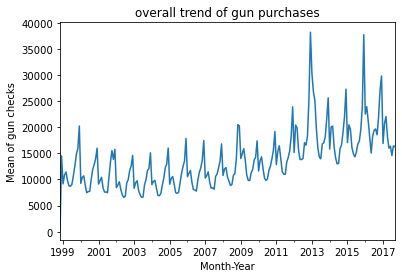

In [109]:
gun_df.groupby('month')['total'].mean().plot(kind = 'line')
plt.title('overall trend of gun purchases')
plt.xlabel('Month-Year')
plt.ylabel('Mean of gun checks');

### Research Question 2
**Which states are the top five highest in total background checks for issuance (1998-2017) of hand guns & long guns?**

In [110]:
gun_df.groupby('state')['total'].sum().nlargest(5)

state
Texas           14145228
California      11847650
Pennsylvania    11549667
Florida          9739042
Ohio             7437782
Name: total, dtype: int32

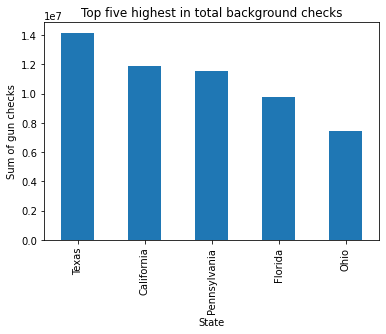

In [111]:
gun_df.groupby('state')['total'].sum().nlargest(5).plot(kind = 'bar')
plt.title('Top five highest in total background checks')
plt.xlabel('State')
plt.ylabel('Sum of gun checks');

### Research Question 3
**What is the correlation between mean gun (issuance of hand guns & long guns only) checks per state and the following state metrics:**
 - Black or African American alone, percent
 - White alone, percent
 - Persons in poverty, percent
 - Bachelor's degree or higher, percent of persons age 25 years+
 - Persons under 18 years, percent
 - Persons 65 years and over, percent
 - Median household income
 
*Note - This analysis will be focused on the year 2015 to 2017*

In [112]:
# filter for year 2015 to 2017, group by state and compute the mean checks
state_df = gun_df.query('month.dt.year >= 2015').groupby('state').mean()

In order to answer this questions effectively we need to merge the *state_df* table and the *census_df* table

In [113]:
merged_df = pd.merge(state_df,census_df, left_on='state', right_index=True, how='inner')
merged_df.rename(columns={ "total":  "gun_checks_mean"}, inplace=True)
merged_df.head()

,hand_gun,long_gun,gun_checks_mean,pop_est,%_under_18,%_over_65,%_black,%_white,%_degree,median_household_income,%_poverty
state,,,,,,,,,,,
Alabama,14110.363636,10600.272727,24710.636364,4863300,22.6,16.1,26.8,65.8,23.5,43623,17.1
Alaska,3005.242424,2899.090909,5904.333333,741894,25.2,10.4,3.8,61.2,28.0,72515,9.9
Arizona,12932.212121,8187.090909,21119.303030,6931071,23.5,16.9,4.9,55.5,27.5,50255,16.4
Arkansas,6324.090909,6360.121212,12684.212121,2988248,23.6,16.3,15.7,72.9,21.1,41371,17.2
California,42983.030303,33906.393939,76889.424242,39250017,23.2,13.6,6.5,37.7,31.4,61818,14.3


To ensure that our analysis is not biased based on the state population, we will find the gun checks proportion with respect to each state population.

In [114]:
# create a new column for gun checks proportion by state population
merged_df['gun_checks_prop'] = merged_df.gun_checks_mean/merged_df.pop_est
merged_df.head()

,hand_gun,long_gun,gun_checks_mean,pop_est,%_under_18,%_over_65,%_black,%_white,%_degree,median_household_income,%_poverty,gun_checks_prop
state,,,,,,,,,,,,
Alabama,14110.363636,10600.272727,24710.636364,4863300,22.6,16.1,26.8,65.8,23.5,43623,17.1,0.005081
Alaska,3005.242424,2899.090909,5904.333333,741894,25.2,10.4,3.8,61.2,28.0,72515,9.9,0.007958
Arizona,12932.212121,8187.090909,21119.303030,6931071,23.5,16.9,4.9,55.5,27.5,50255,16.4,0.003047
Arkansas,6324.090909,6360.121212,12684.212121,2988248,23.6,16.3,15.7,72.9,21.1,41371,17.2,0.004245
California,42983.030303,33906.393939,76889.424242,39250017,23.2,13.6,6.5,37.7,31.4,61818,14.3,0.001959


**Correlation between gun checks proportion and Black or African American alone, percent**

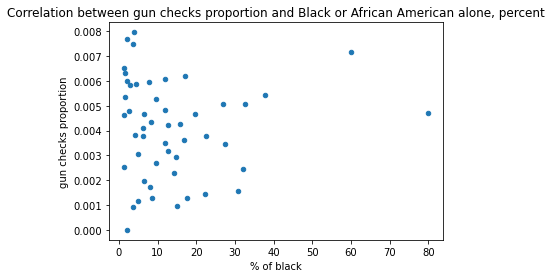

In [115]:
merged_df.plot(x='%_black', y= 'gun_checks_prop', kind = 'scatter')
plt.title('Correlation between gun checks proportion and Black or African American alone, percent')
plt.xlabel('% of black')
plt.ylabel('gun checks proportion');

**Correlation between gun checks proportion and White alone, percent**

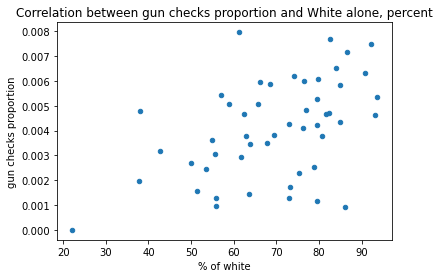

In [116]:
merged_df.plot(x='%_white', y= 'gun_checks_prop', kind = 'scatter')
plt.title('Correlation between gun checks proportion and White alone, percent')
plt.xlabel('% of white')
plt.ylabel('gun checks proportion');

**Correlation between gun checks proportion and Persons in poverty, percent**

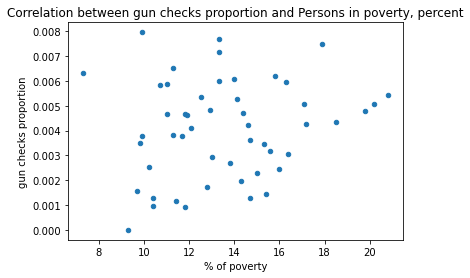

In [117]:
merged_df.plot(x='%_poverty', y= 'gun_checks_prop', kind = 'scatter')
plt.title('Correlation between gun checks proportion and Persons in poverty, percent')
plt.xlabel('% of poverty')
plt.ylabel('gun checks proportion');

**Correlation between gun checks proportion and Bachelor's degree or higher, percent of persons age 25 years+**

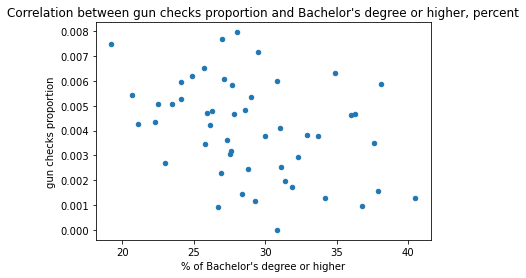

In [118]:
merged_df.plot(x='%_degree', y= 'gun_checks_prop', kind = 'scatter')
plt.title("Correlation between gun checks proportion and Bachelor's degree or higher, percent")
plt.xlabel("% of Bachelor's degree or higher")
plt.ylabel('gun checks proportion');

**Correlation between gun checks proportion and Persons under 18 years, percent**

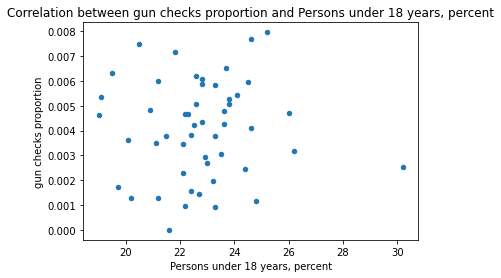

In [119]:
merged_df.plot(x='%_under_18', y= 'gun_checks_prop', kind = 'scatter')
plt.title("Correlation between gun checks proportion and Persons under 18 years, percent")
plt.xlabel("Persons under 18 years, percent")
plt.ylabel('gun checks proportion');

**Correlation between gun checks proportion and Persons 65 years and over, percent**

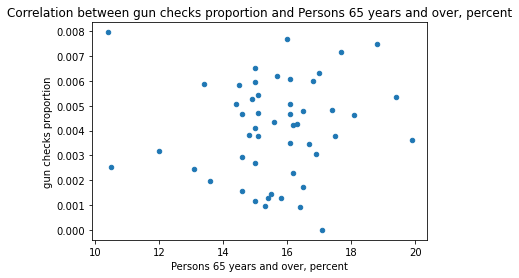

In [120]:
merged_df.plot(x='%_over_65', y= 'gun_checks_prop', kind = 'scatter')
plt.title("Correlation between gun checks proportion and Persons 65 years and over, percent")
plt.xlabel("Persons 65 years and over, percent")
plt.ylabel('gun checks proportion');

**Correlation between gun checks proportion and Median household income**

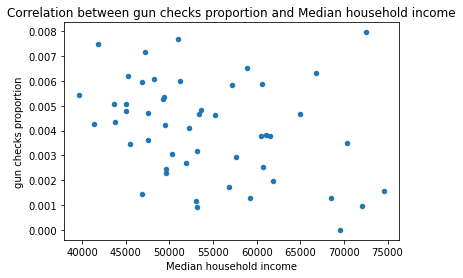

In [121]:
merged_df.plot(x='median_household_income', y= 'gun_checks_prop', kind = 'scatter')
plt.title("Correlation between gun checks proportion and Median household income")
plt.xlabel("Median household income")
plt.ylabel('gun checks proportion');

<a id='conclusions'></a>
## Conclusions

We have been able to:
 - Explore the trend of gun checks and we notice that the peak was in 2013.
 - Which states are the top five highest in total background checks. Top five states are Texas, California, Pennsylvania, Florida and Ohio.
 - See the correlation between some state metrics and how they may influence the number of gun checks by state.
         - Black or African American alone: Based on the chart, it appears that we have no correlation.
         - White alone: Based on the chart, it appears that we have a weak positive correlation.
         - Persons in poverty: Based on the chart, it appears that we have a very weak positive correlation.
         - Bachelor's degree or higher: Based on the chart, it appears that we have a very weak negative correlation.
         - Persons under 18 years: Based on the chart, it appears that we have no correlation.
         - Persons 65 years and over: Based on the chart, it appears that we have a weak positive correlation.
         - Median household income: Based on the chart, it appears that we have no correlation.

*No statistical test was done, hence no statistical conclusions*